DEV No Standard Dimensions. Image height:  1092
Hypso Source
   uncorrectedHypsoLon uncorrectedHypsoLat
0            10.68641           60.743563
1           10.724308           60.803516
2           10.673804           60.900916
3           10.626465           60.833595
4           10.820554           60.895276
5            10.66866           60.855825
6           10.388779           59.951837
7           10.072628           59.804041
8              9.9973           59.989327
Hypso Destination
    transformed_mapLon  transformed_mapLat
0           10.971982           60.657430
1           11.015692           60.714306
2           10.972319           60.808944
3           10.917637           60.743548
4           11.108353           60.808696
5           10.965565           60.768988
6           10.658683           59.868192
7           10.367120           59.714920
8           10.298489           59.897587
--------------------------------
Generating Geotiff
  This script requires thre

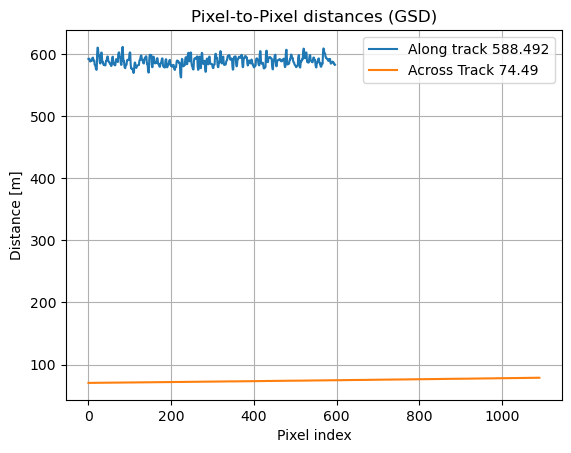

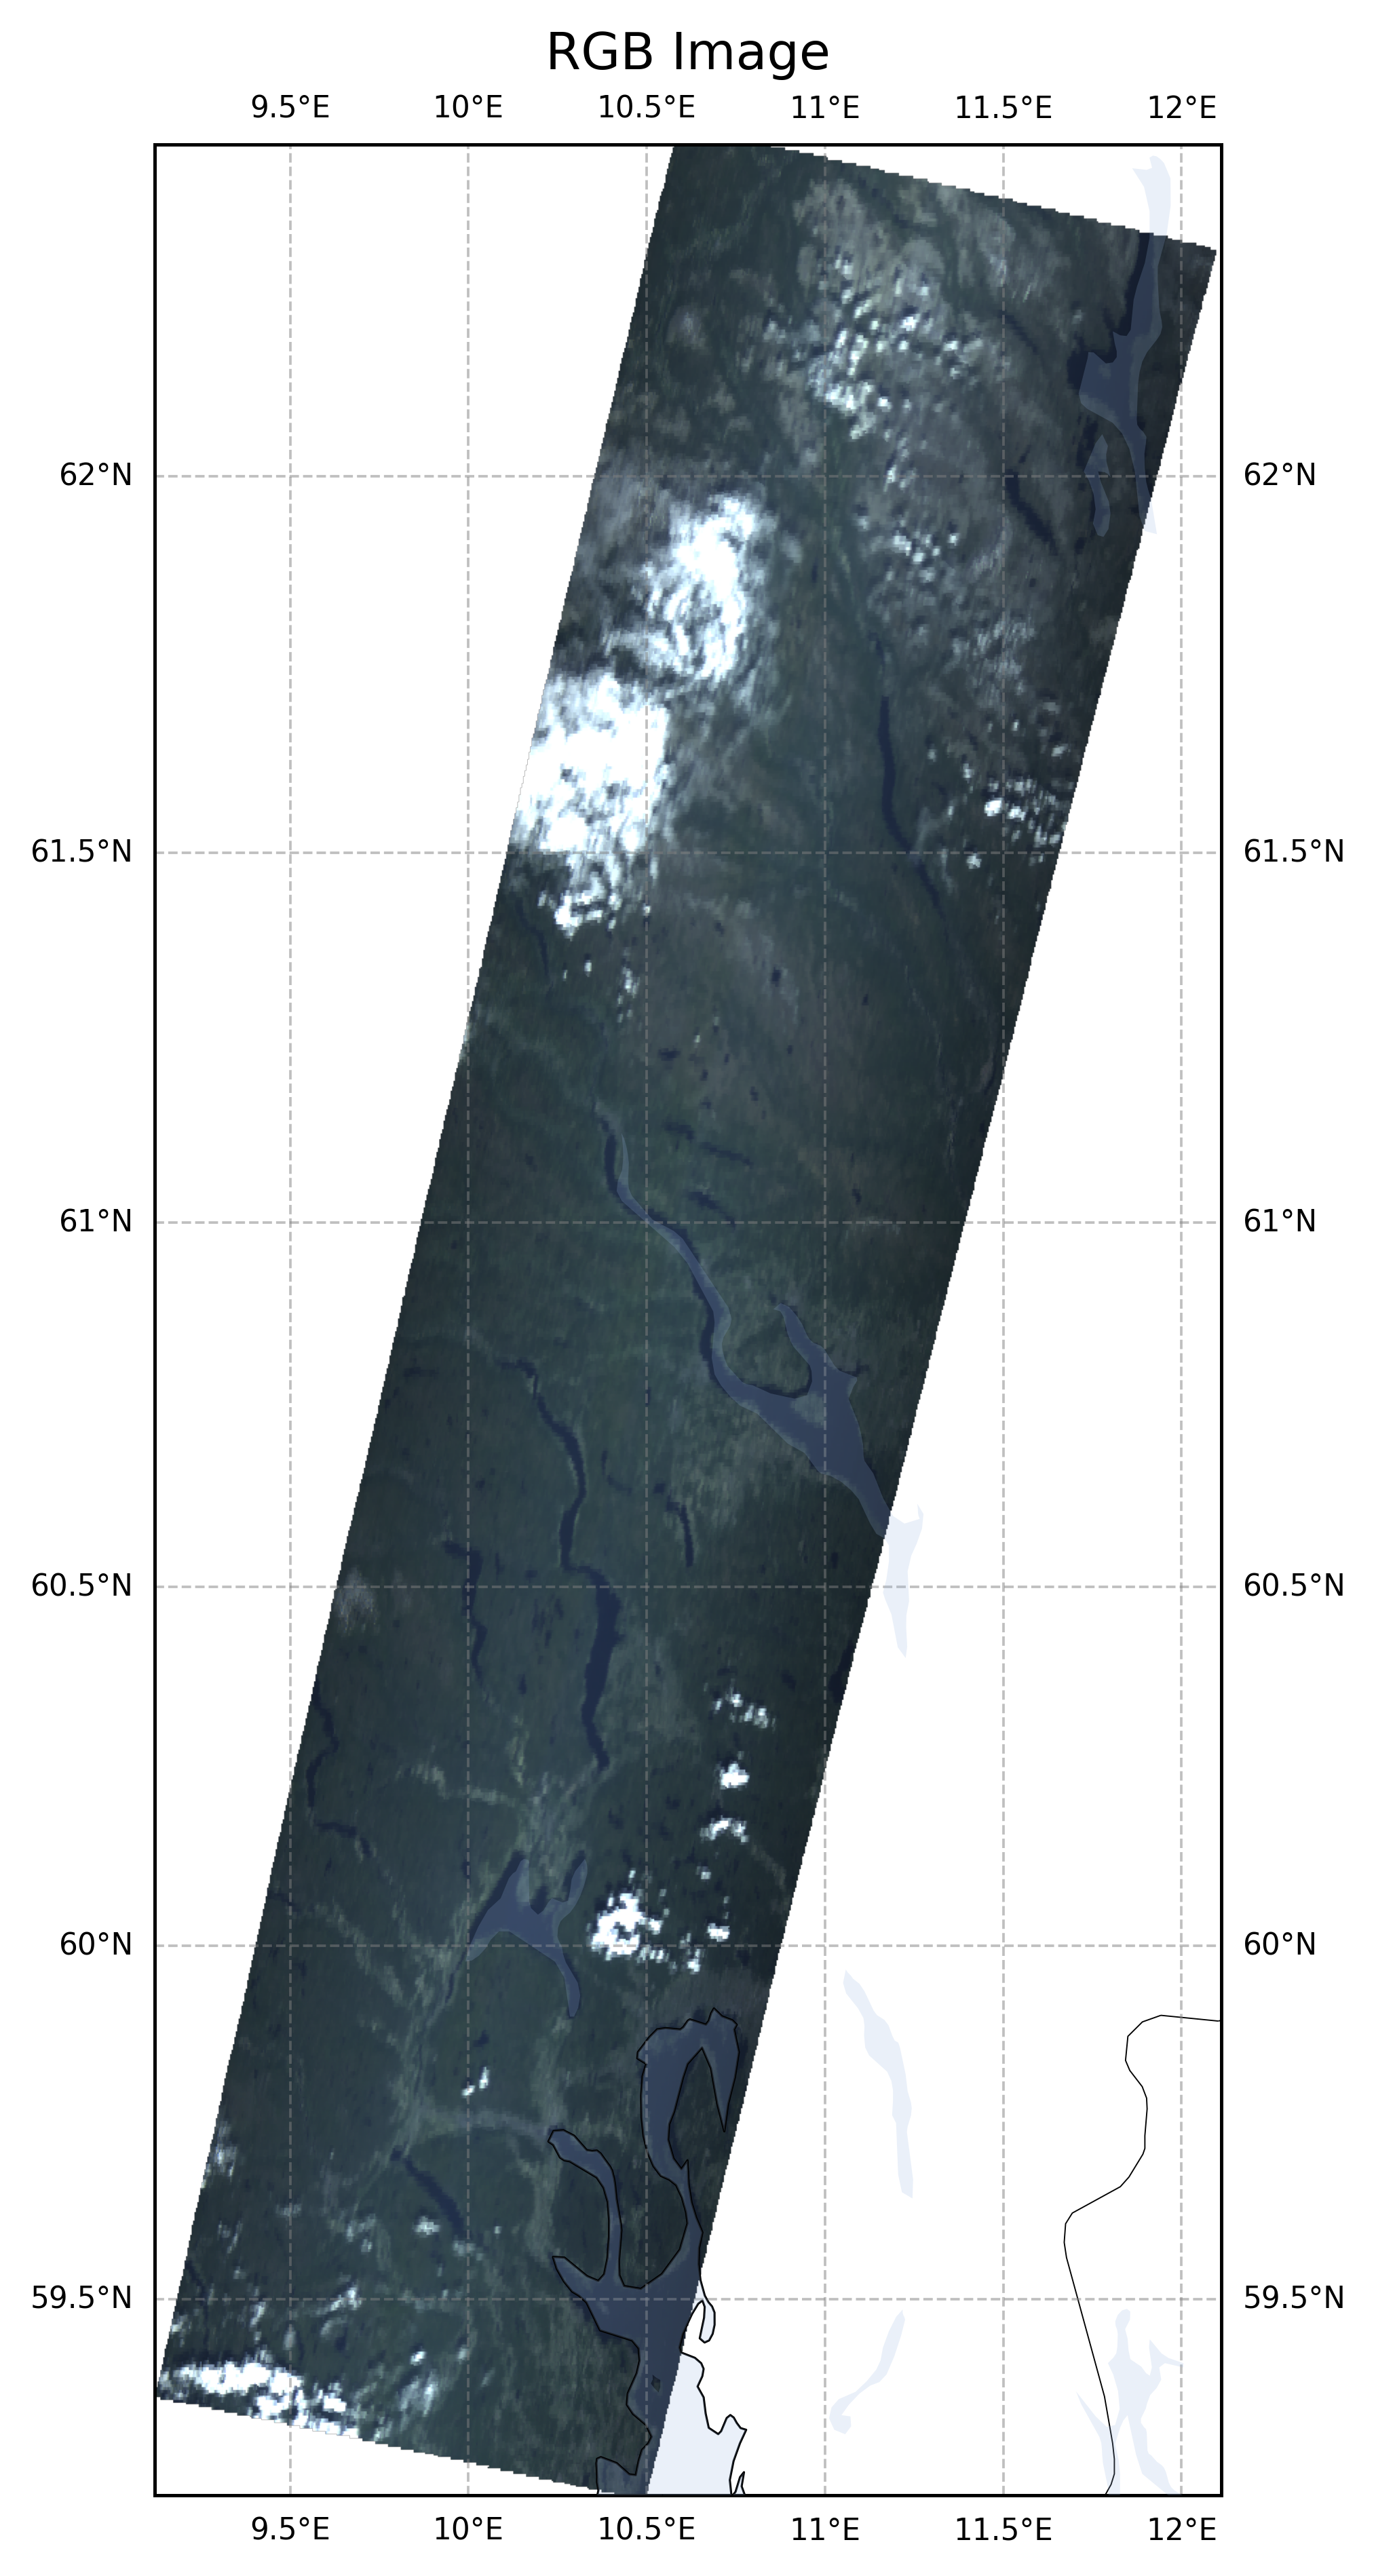

CPU times: user 14min 3s, sys: 13.8 s, total: 14min 17s
Wall time: 1min 41s


In [1]:
%%time
# Satellite Object
from hypsoreader import Satellite

# Plot Fn
from hypsoreader.plot import write_rgb_map, write_rgb, plot_chlorophyll

#
from hypsoreader.georeference import generate_geotiff
from hypsoreader.spectra import print_this

from hypsoreader.exportfiles import write_h1data_as_NetCDF4, print_nc

hypso_dir = r"/Users/alvaroflores/Documents/florida_2023-01-07_1524Z"
# hypso_dir = r"D:\4th Semester\Code\Datasets\Bundles\Bundle2\florida_2023-01-07_1524Z"
hypso_dir = r"/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z"
satobj = Satellite(hypso_dir)

write_rgb_map(satobj)


Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.7776, 11.0895) -→ (853, 439)


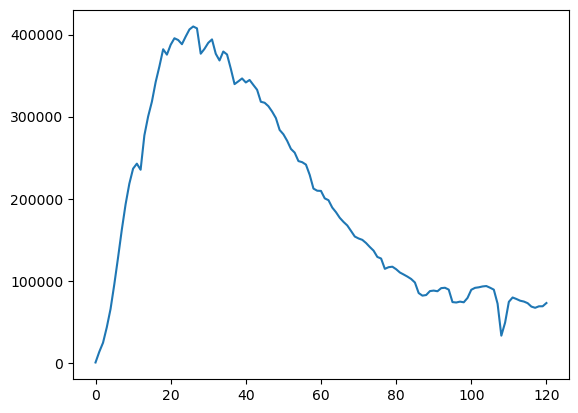

In [4]:
import matplotlib.pyplot as plt
import numpy as np
spectra = satobj.get_spectra([60.7776,11.0895],postype="coord")
array = np.array(spectra)
spectra.head()
plt.plot(np.array(spectra)[0,3:])

In [ ]:
import numpy as np
print("Min Lat: ",np.nanmin(satobj.info["lat"]))
print("Max Lat: ",np.nanmax(satobj.info["lat"]))
print("Min Lon: ",np.nanmin(satobj.info["lon"]))
print("Max Lon: ",np.nanmax(satobj.info["lon"]))


In [ ]:
write_h1data_as_NetCDF4(satobj, path_to_save=r"/Users/alvaroflores/Desktop/demo.nc")
#print_nc(r"/Users/alvaroflores/Desktop/caca.nc")

In [ ]:
import netCDF4 as nc
print_nc(nc.Dataset(r"/Users/alvaroflores/Desktop/demo.nc", format="NETCDF4"))

In [ ]:
rg_img = write_rgb(satobj,path_to_save=r"/Users/alvaroflores/Desktop/image_demo.png")

In [ ]:
import numpy as np
chl_array = np.random.normal(1, 10, size=satobj.spatialDim)

plot_chlorophyll(satobj,chl_array)